In [3]:
import os
def change_to_code_dir():
    current_dir = os.getcwd()
    if os.path.basename(current_dir) == "p2ch15":
        parent_dir = os.path.dirname(current_dir)
        os.chdir(parent_dir)    
change_to_code_dir()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from p2ch15.utils import get_sam_model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
from segment_anything import SamPredictor, sam_model_registry
model_config, model_weights_path = get_sam_model()

sam = sam_model_registry[model_config](checkpoint=model_weights_path)
sam.to(device)
predictor = SamPredictor(sam)

In [6]:
# Load the local image
image_path = "data/p1ch2/bobby.jpg"
# image_path = "data/p2ch10/astronaut.png"
image = Image.open(image_path).convert("RGB")

In [7]:
image.size

(1280, 720)

In [8]:
input_points = np.array([(320, 260)])
predictor.set_image(np.array(image))
masks, _, _ = predictor.predict(input_points, point_labels=np.array([1]))

In [9]:
len(masks)

3

In [10]:
print(masks[0].shape)

(720, 1280)


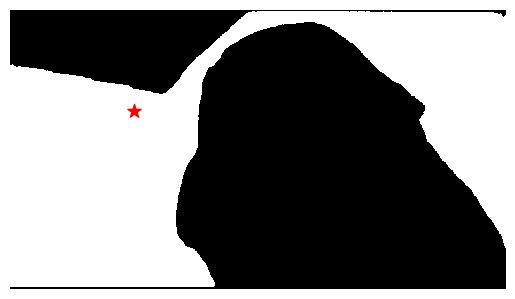

In [11]:
def plot_mask_with_point(mask, point):
    """
    Plots a boolean mask as a black and white image and overlays a point.
    Parameters:
    mask (numpy.ndarray): A 2D array of boolean values.
    point (list or tuple): A list or tuple containing the (x, y) coordinates of the point.
    Returns:
    None
    """
    # Convert the boolean mask to an integer array (True -> 1, False -> 0)
    int_mask = mask.astype(int)
    # Plot the mask
    plt.imshow(int_mask, cmap='gray', interpolation='nearest')
    
    # Overlay the point
    plt.scatter(point[0], point[1], color='red', s=100, marker='*')
    
    plt.axis('off')  # Turn off the axis
    plt.show()

plot_mask_with_point(masks[0], input_points[0])

/var/folders/n1/ygzk0n895x15grwb5rm1ld300000gn/T/ipykernel_69954/2448493295.py:20: UserWarning: linewidths is ignored by contourf
  plt.contourf(mask, levels=[0.5, 1], colors=[colors[i]], alpha=0.4, linewidths=1)


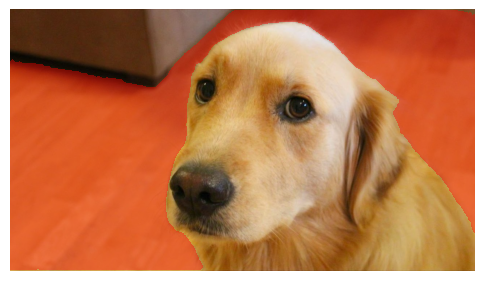

In [27]:
def plot_original_image_with_masks(image, masks):
    """
    Plots the image with masks overlaid in different colors.
    Args:
        image (PIL.Image): The original image.
        masks (list of np.ndarray): List of boolean masks.
    """
    # Convert image to numpy array
    image_np = np.array(image)
    # Create a figure and axis
    fig, ax = plt.subplots(1, figsize=(6, 6))
    ax.imshow(image_np, cmap='gray')
    # Generate a colormap
    cmap = plt.get_cmap('hsv')
    num_colors = len(masks)
    colors = [cmap(i / num_colors) for i in range(num_colors)]
    # Plot each mask
    for i, mask in enumerate(masks):
        # Find contours of the mask
        plt.contourf(mask, levels=[0.5, 1], colors=[colors[i]], alpha=0.4, linewidths=1)
    plt.axis('off')
    plt.show()

plot_original_image_with_masks(image, [masks[0]])